# Modul 5 Praktikum Sains Data

# K-Nearest Neighbor

![](./knn.jpg)

K-Nearest neighbor adalah salah satu jenis algoritma supervised learning. Biasanya, algoritma ini digunakan untuk masalah klasifikasi.
Kelas dari data tersebut ditentukan dari sejumlah k titik yang berperan "tetangga". Pada gambar di atas, ketika k = 3, bintang akan diklasifikasikan sebagai kelas ungu, sebab mayoritas dari tetangganya adalah ungu. Sedangkan, ketika k = 6, bintang akan diklasifikasikan sebagai kelas kuning. 

In [1]:
#import modul
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Data

Pada module kali ini, akan digunakan data csv teleCust1000t (`teleCust1000t.csv`) yang bisa didownload dari:
- [Kaggle](https://www.kaggle.com/code/zohaib123/telecusts-prediction-k-nearest-neighbors)

In [4]:
 #membaca dataset
df = pd.read_csv('./teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
#menghitung jumlah anggota tiap kelas
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

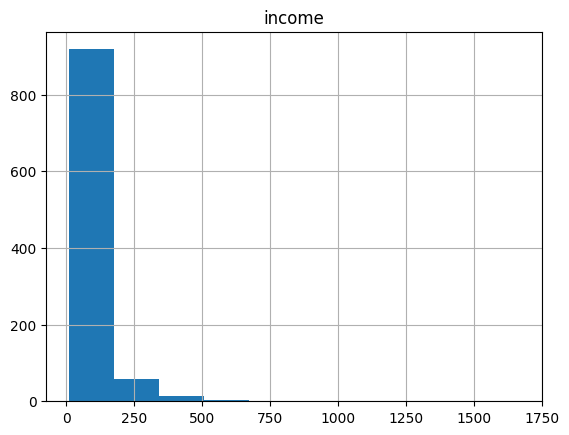

In [6]:
 #melihat sebaran income dengan histogram
df.hist(column='income')

In [7]:
#melihat 4 row pertama
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire','gender', 'reside']].values
X[0:4]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.]])

In [8]:
#melihat kelas dari 4 row pertama
Y = df[['custcat']].values
Y[0:4]

array([[1],
       [4],
       [3],
       [1]], dtype=int64)

## Preprocessing

In [9]:
from sklearn import preprocessing

In [10]:
#normalize data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:4]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794]])

## Train test split

In [11]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 4)

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(800, 11)
(800, 1)
(200, 11)
(200, 1)


## Membuat model

In [13]:
#membuat model dengan k = 4
from sklearn.neighbors import KNeighborsClassifier
k = 4
neighbor = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Prediksi

In [14]:
#hasil prediksi
ypredict = neighbor.predict(X_test)
ypredict[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [15]:
#kelas sebenarnya
Y_test[0:5]

array([[4],
       [1],
       [1],
       [2],
       [4]], dtype=int64)

## Evaluasi Model

In [16]:
#menghitung akurasi
from sklearn import metrics
metrics.accuracy_score(Y_test,ypredict)

0.32

## Membuat model dengan k lainnya

In [17]:
#membuat model dengan k = 6
k = 6
neighbor_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [18]:
#hasil prediksi
ypredict6 = neighbor_6.predict(X_test)
ypredict6[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

In [19]:
#kelas sebenarnya
Y_test[0:5]

array([[4],
       [1],
       [1],
       [2],
       [4]], dtype=int64)

In [20]:
#akurasi
metrics.accuracy_score(Y_test,ypredict6)

0.31

## Mencari k terbaik

Kinerja model K-NN sangat bergantung pada jumlah k yang dipilih. Kita dapat menentukan k terbaik dengan menggunakan loop.

In [21]:
#mencari k terbaik diantara 1<=k<=10
nk = 10

mean_acc= np.zeros((nk))
std_acc = np.zeros((nk))

for n in range(1,nk+1):
 neighbor_k = KNeighborsClassifier(n_neighbors= n).fit(X_train,Y_train)
 ypredict = neighbor_k.predict(X_test)
 mean_acc[n-1] = metrics.accuracy_score(Y_test, ypredict)
 std_acc[n-1]= np.std(ypredict==Y_test)/np.sqrt(ypredict.shape[0])

mean_acc

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 ])

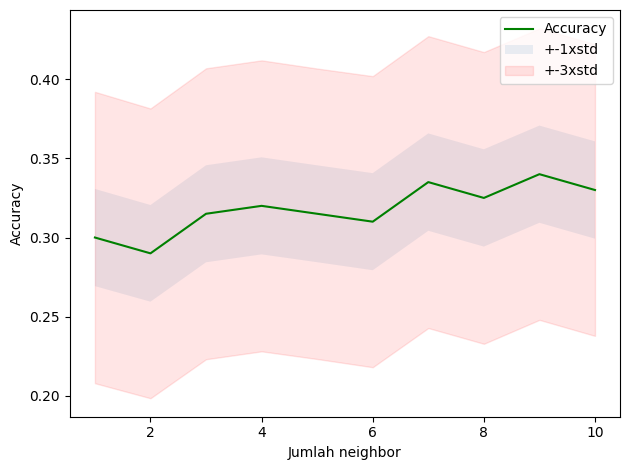

In [22]:
#plot akurasi dari beberapa k
plt.plot(range(1,nk+1),mean_acc,'g')
plt.fill_between(range(1,nk+1),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha = 0.10)
plt.fill_between(range(1,nk+1),mean_acc-3*std_acc,mean_acc+3*std_acc,alpha = 0.10, color = "red")
plt.legend(('Accuracy', '+-1xstd', '+-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Jumlah neighbor')
plt.tight_layout()
plt.show()

In [23]:
#k terbaik beserta hasilnya
print("akurasi terbaik model adalah", mean_acc.max(), "dengan jumlah k=", mean_acc.argmax()+1)

akurasi terbaik model adalah 0.34 dengan jumlah k= 9
